In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [2]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_close_stim.xlsx',
      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_far_stim.xlsx',
      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_close_delay.xlsx',
      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_far_delay.xlsx']


paths_distractor=['C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_close_stim.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_far_stim.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_close_delay.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_far_delay.xlsx']



In [4]:
df_target=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    for area in ['visual', 'ips', 'pfc']:
        for idx, condit in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
            #f = functions[idx]
            subjects=['b001', 'n001', 'r001', 'd001', 'l001', 's001']
            lst = [subjects[i] + '_' + area + '_' + condit for i in range(len(subjects))]
            dfs=[]
            for idx, sheets in enumerate(lst):
                Df = pd.read_excel(path_save_signal, sheet_name=sheets)
                if condit == '1_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '1_7':
                    dec_value = np.round(Df.iloc[3:5].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_7':
                    dec_value = np.round(Df.iloc[6:10].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])

####
dft = pd.DataFrame(df_target)
dft.columns = ['decoding', 'area', 'condition', 'subject', 'item', 'distance', 'trained']

In [5]:
df_distractor=[]

for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    for area in ['visual', 'ips', 'pfc']:
        for idx, condit in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
            #f = functions[idx]
            subjects=['b001', 'n001', 'r001', 'd001', 'l001', 's001']
            lst = [subjects[i] + '_' + area + '_' + condit for i in range(len(subjects))]
            dfs=[]
            for idx, sheets in enumerate(lst):
                Df = pd.read_excel(path_save_signal, sheet_name=sheets)
                if condit == '1_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '1_7':
                    dec_value = np.round(Df.iloc[6:10].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_7':
                    dec_value = np.round(Df.iloc[3:5].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])

###
dfd = pd.DataFrame(df_distractor)
dfd.columns = ['decoding', 'area', 'condition', 'subject', 'item', 'distance', 'trained']

In [6]:
df = pd.concat([dft, dfd])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

,decoding,area,condition,subject,item,distance,trained,label
0,0.115,visual,1_0.2,b001,target,close,stim,tc
1,0.099,visual,1_0.2,n001,target,close,stim,tc
2,0.146,visual,1_0.2,r001,target,close,stim,tc
3,0.170,visual,1_0.2,d001,target,close,stim,tc
4,0.141,visual,1_0.2,l001,target,close,stim,tc


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


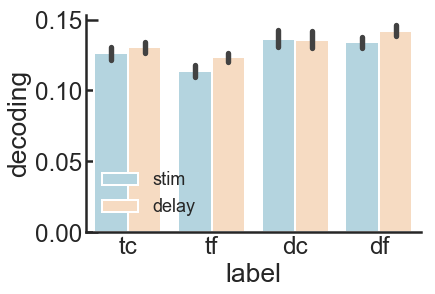

In [10]:
## Colapsandolo todo: Condition y area
sns.barplot(x='label', y='decoding', hue='trained', data=df, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


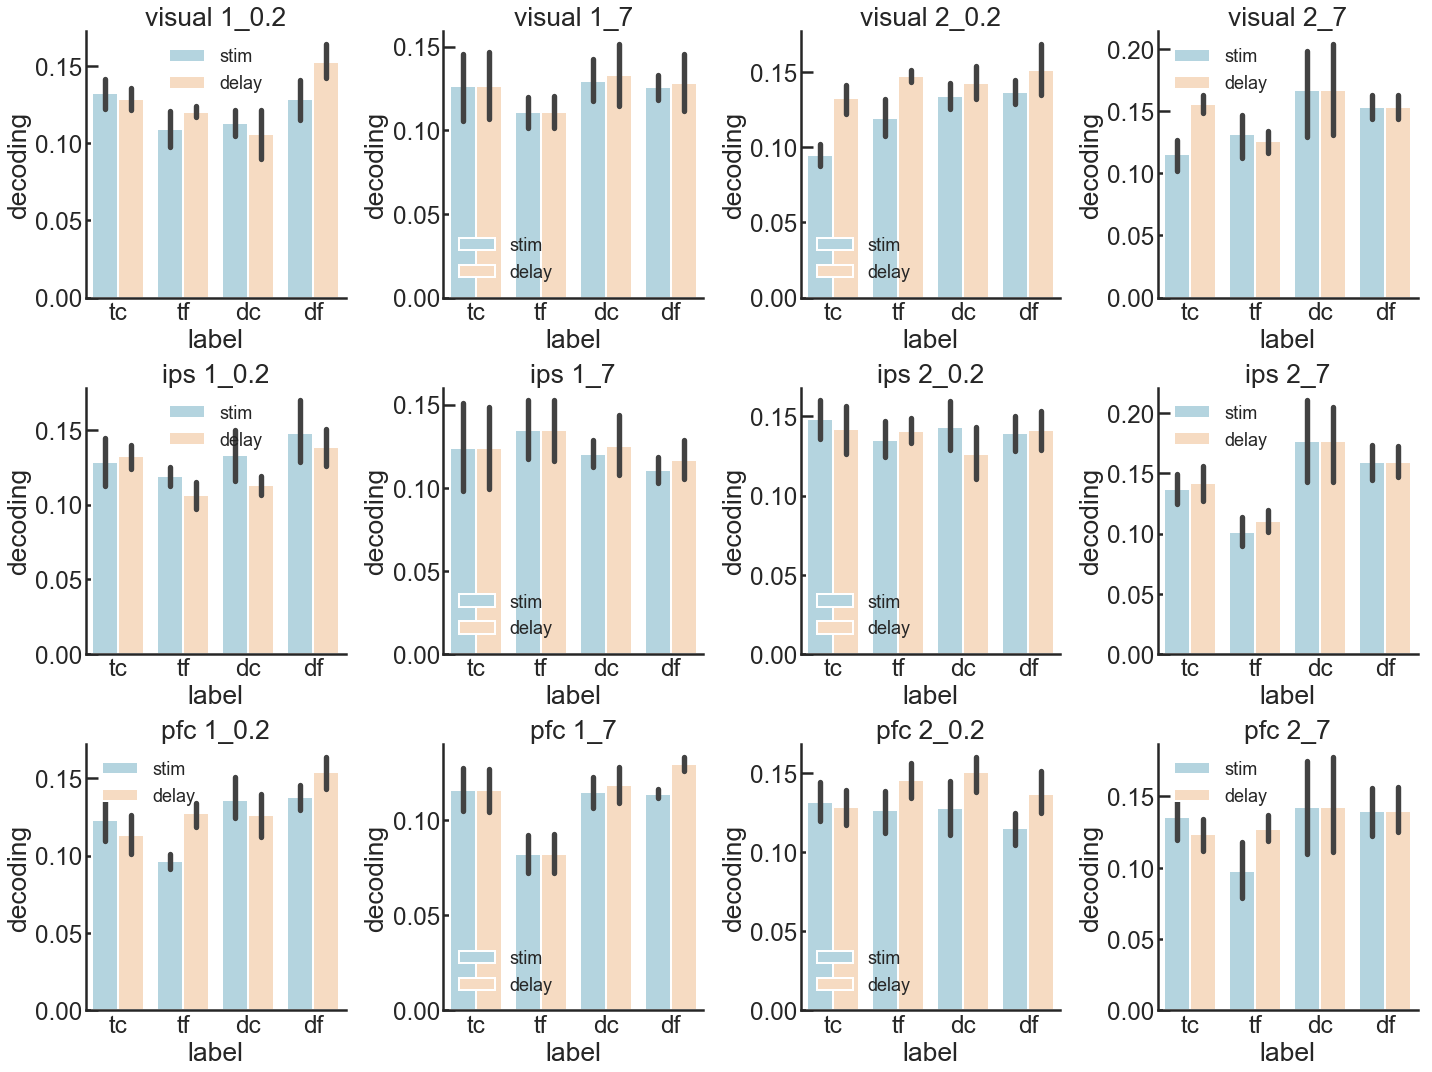

In [15]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding', hue='trained', 
                    data=df.loc[(df['condition']==C) & (df['area']==A)], 
                    palette=['lightblue', 'peachpuff'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


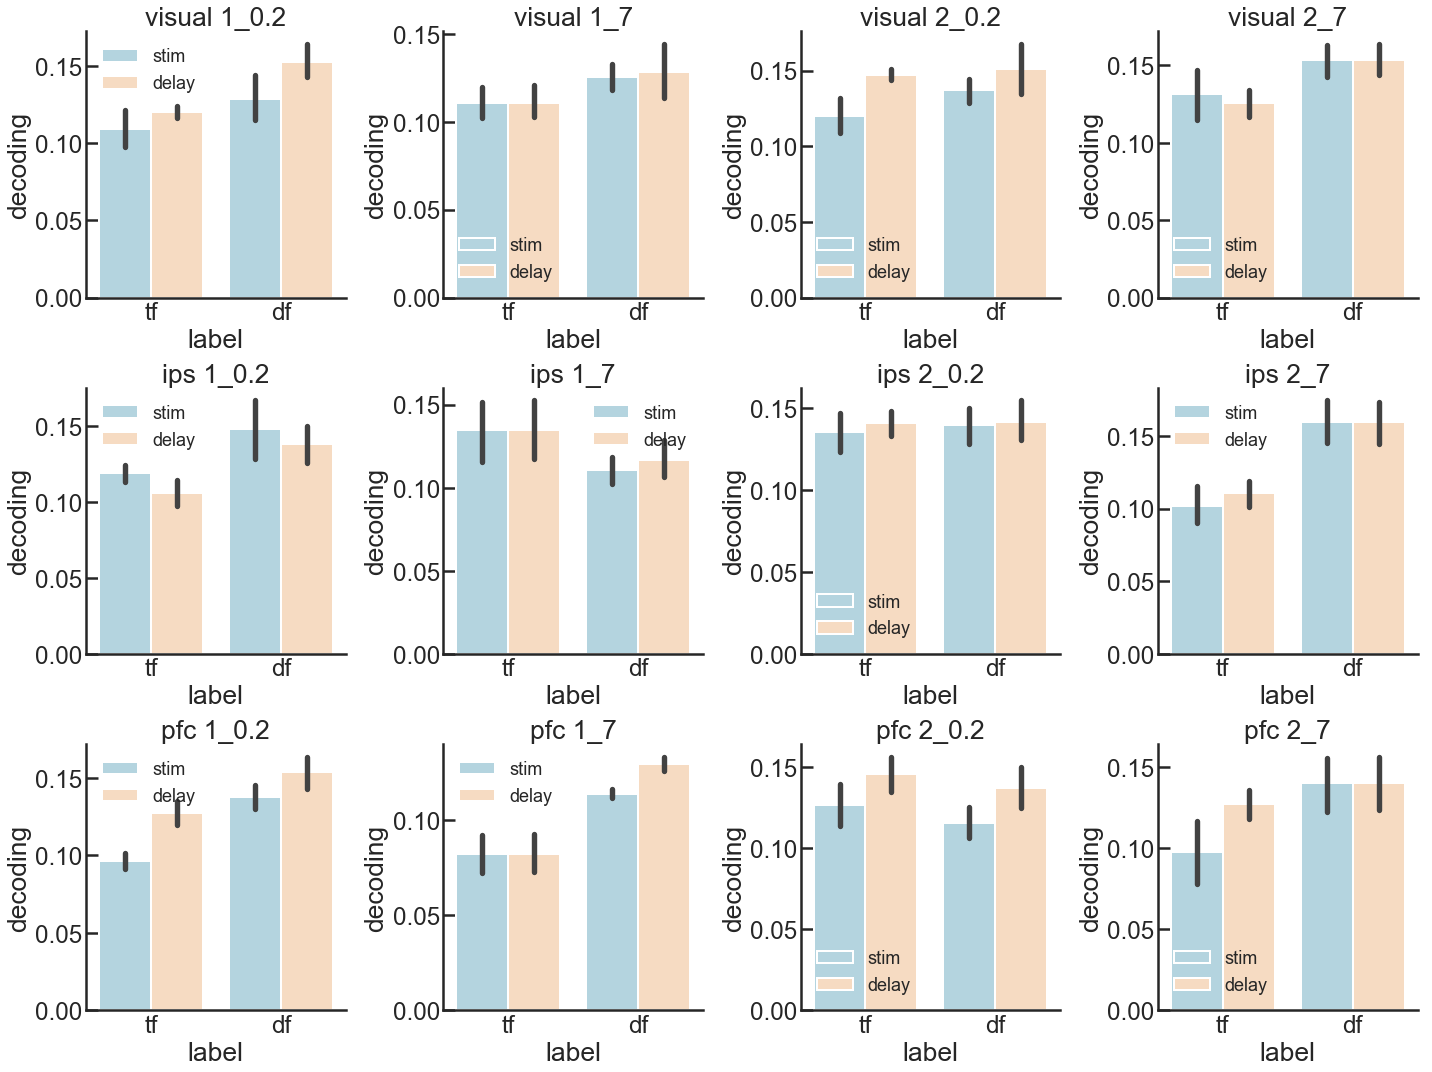

In [13]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding', hue='trained', order=['tf', 'df'],
                    data=df.loc[(df['condition']==C) & (df['area']==A)], 
                    palette=['lightblue', 'peachpuff'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

### Gitter the times 1 tr and add response (just one TR)

In [5]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_close_stim3.xlsx',
      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_far_stim3.xlsx',
      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_close_delay3.xlsx',
      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_far_delay3.xlsx', 
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_far_resp.xlsx',
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_target_far_resp.xlsx']          


paths_distractor=['C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_close_stim3.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_far_stim3.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_close_delay3.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_far_delay3.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_far_resp.xlsx',
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_dist_far_resp.xlsx'] 

In [6]:
df_target=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    for area in ['visual', 'ips', 'pfc']:
        for idx, condit in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
            #f = functions[idx]
            subjects=['b001', 'n001', 'r001', 'd001', 'l001', 's001']
            lst = [subjects[i] + '_' + area + '_' + condit for i in range(len(subjects))]
            dfs=[]
            for idx, sheets in enumerate(lst):
                Df = pd.read_excel(path_save_signal, sheet_name=sheets)
                if condit == '1_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '1_7':
                    dec_value = np.round(Df.iloc[3:5].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_7':
                    dec_value = np.round(Df.iloc[6:10].values.mean(), 3)
                    df_target.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])

####
dft = pd.DataFrame(df_target)
dft.columns = ['decoding', 'area', 'condition', 'subject', 'item', 'distance', 'trained']


df_distractor=[]

for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    for area in ['visual', 'ips', 'pfc']:
        for idx, condit in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
            #f = functions[idx]
            subjects=['b001', 'n001', 'r001', 'd001', 'l001', 's001']
            lst = [subjects[i] + '_' + area + '_' + condit for i in range(len(subjects))]
            dfs=[]
            for idx, sheets in enumerate(lst):
                Df = pd.read_excel(path_save_signal, sheet_name=sheets)
                if condit == '1_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '1_7':
                    dec_value = np.round(Df.iloc[6:10].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_0.2':
                    dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])
                if condit == '2_7':
                    dec_value = np.round(Df.iloc[3:5].values.mean(), 3)
                    df_distractor.append([dec_value, area, condit, subjects[idx], dec_thing, distance, training_region])

###
dfd = pd.DataFrame(df_distractor)
dfd.columns = ['decoding', 'area', 'condition', 'subject', 'item', 'distance', 'trained']


########################

df = pd.concat([dft, dfd])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df['trained'] = df['trained'].replace(['stim3', 'delay3', 'resp'], ['stim', 'delay', 'resp'])
df.head()


,decoding,area,condition,subject,item,distance,trained,label
0,0.135,visual,1_0.2,b001,target,close,stim3,tc
1,0.188,visual,1_0.2,n001,target,close,stim3,tc
2,0.160,visual,1_0.2,r001,target,close,stim3,tc
3,0.108,visual,1_0.2,d001,target,close,stim3,tc
4,0.122,visual,1_0.2,l001,target,close,stim3,tc


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


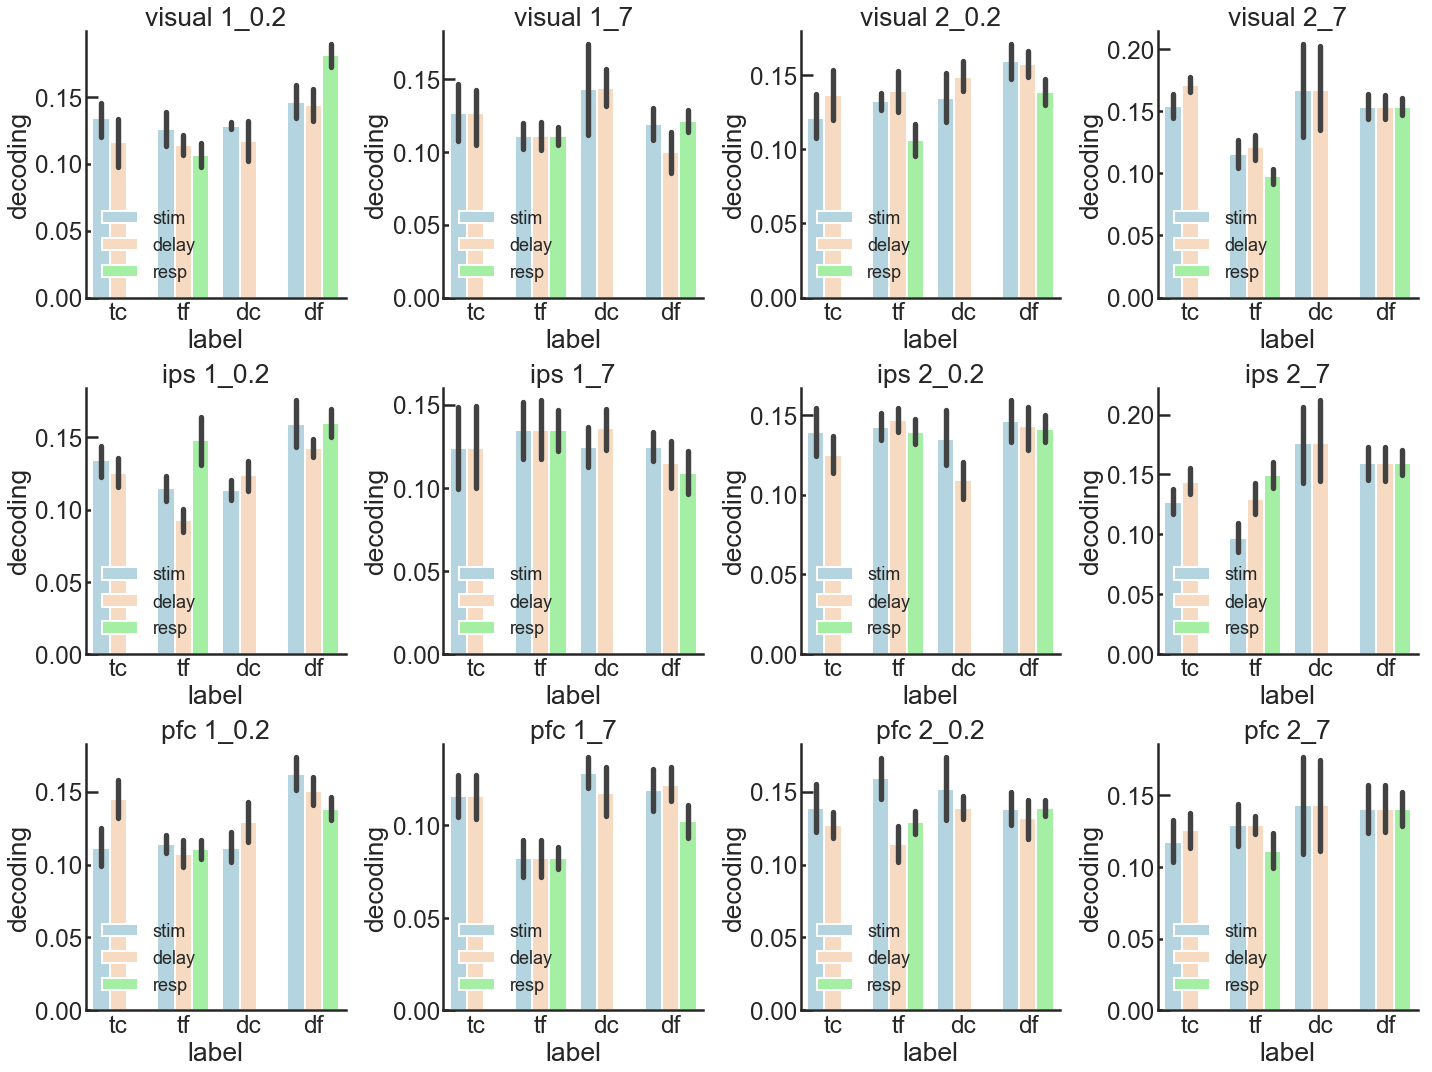

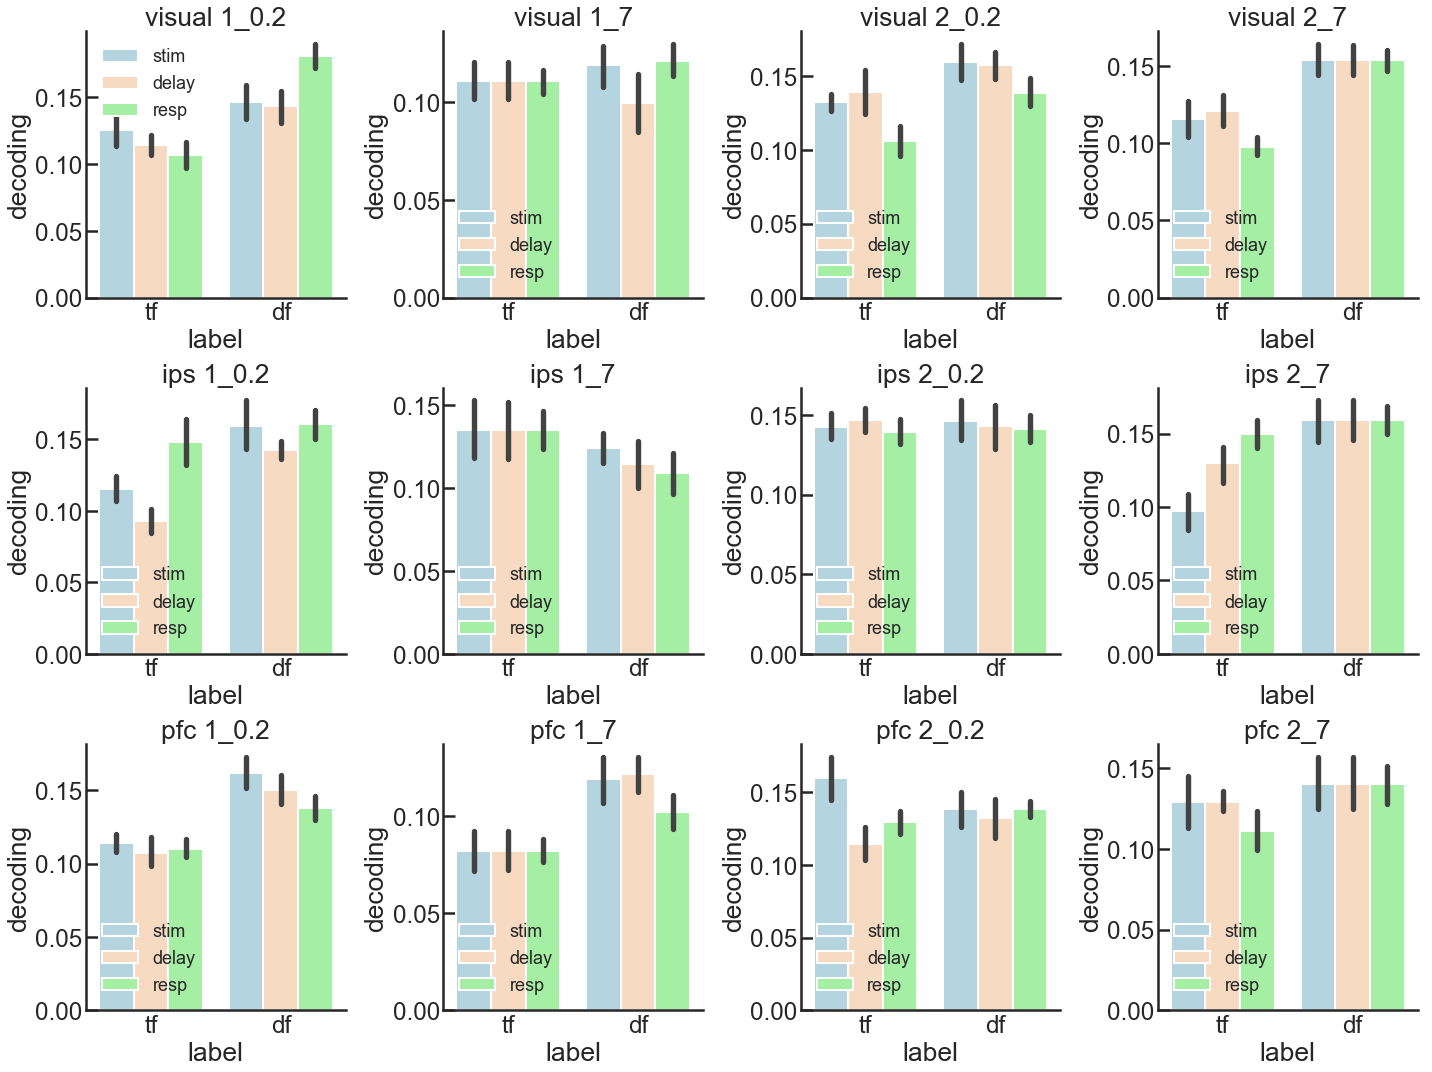

In [11]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding', hue='trained', 
                    data=df.loc[(df['condition']==C) & (df['area']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()
plt.show()

print('')
print('')
print('')

plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding', hue='trained', order=['tf', 'df'],
                    data=df.loc[(df['condition']==C) & (df['area']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


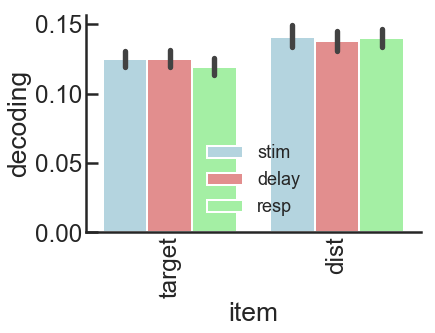

In [14]:
sns.barplot(x='item', y='decoding', hue='trained', data=df, palette=['lightblue', 'lightcoral', 'palegreen'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=90)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


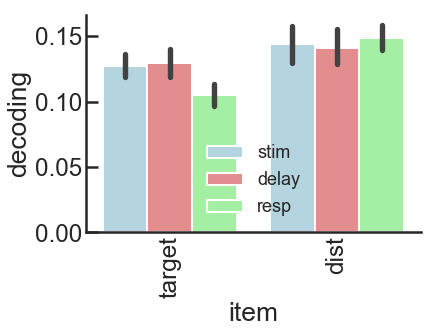

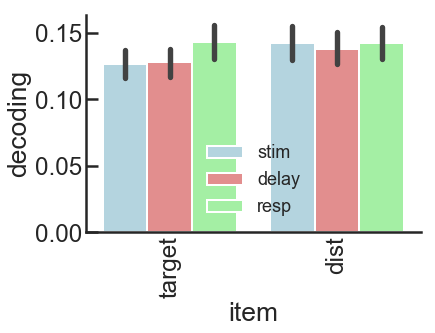

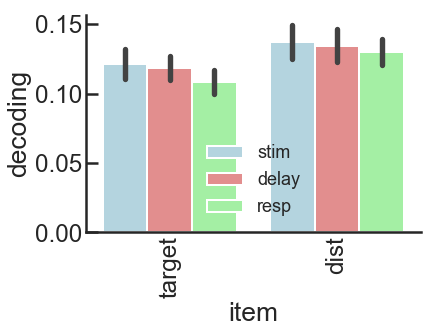

In [15]:
for A in ['visual', 'ips', 'pfc']:
    sns.barplot(x='item', y='decoding', hue='trained', data=df.loc[df['area']==A],
                palette=['lightblue', 'lightcoral', 'palegreen'])
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.legend(loc='best', frameon=False, prop={'size': 18})
    plt.xticks(rotation=90)
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


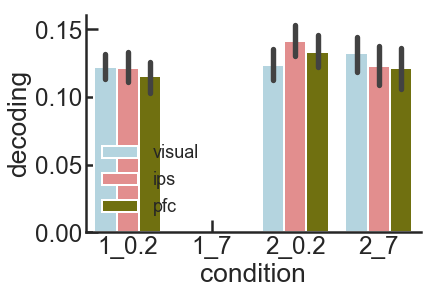

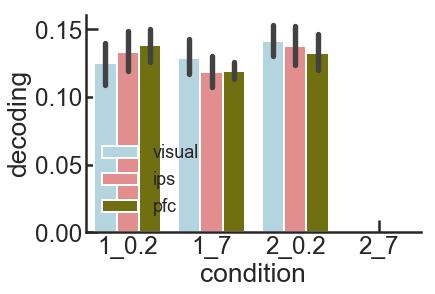

In [89]:
sns.barplot(x='condition', y='decoding', hue='area', data=df.loc[df['item']=='target'], palette=['lightblue', 'lightcoral', 'olive'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.show()

sns.barplot(x='condition', y='decoding', hue='area', data=df.loc[df['item']=='dist'], palette=['lightblue', 'lightcoral', 'olive'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})

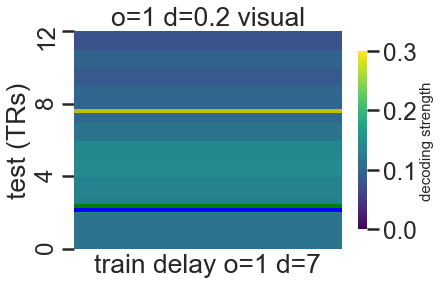

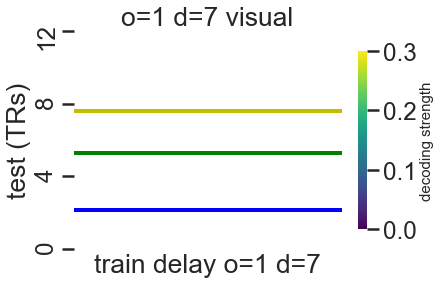

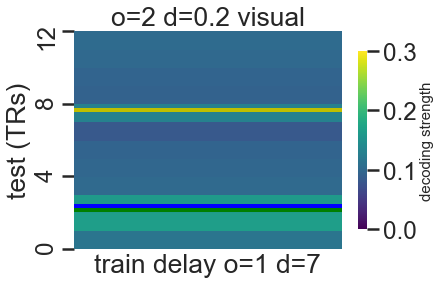

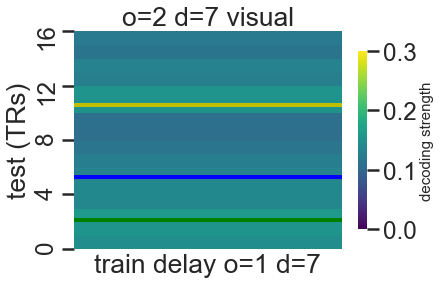

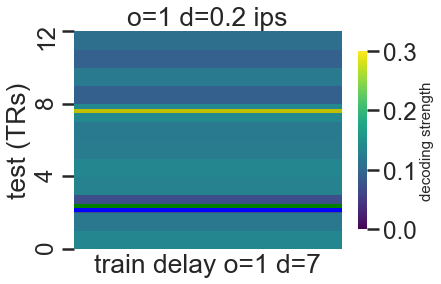

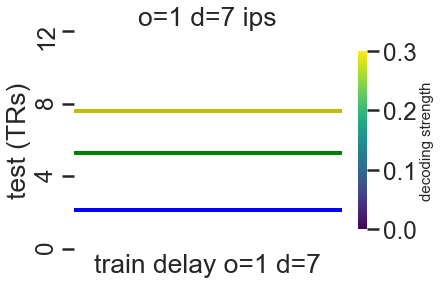

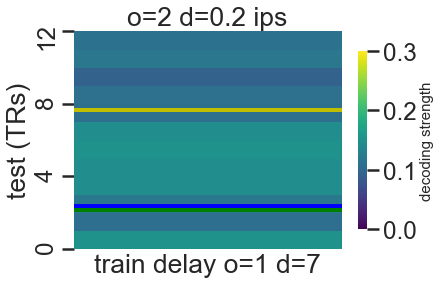

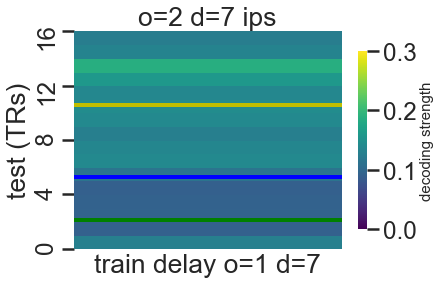

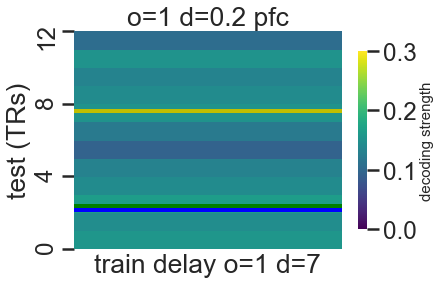

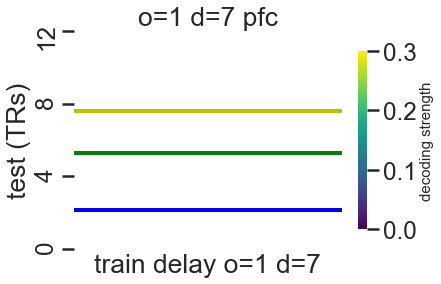

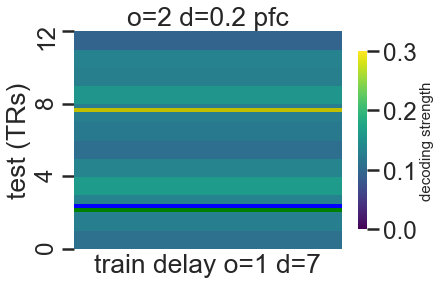

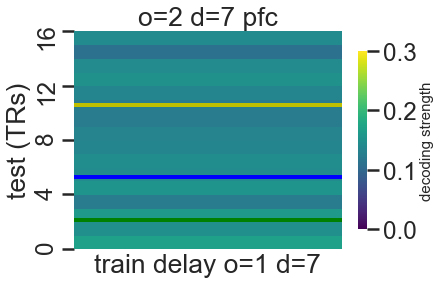

In [61]:
functions=[heatmap__1_02,heatmap__1_7,heatmap__2_02,heatmap__2_7]
df_dec=[]

for distance in ['close', 'far']:
    for training_region in ['stim', 'delay']:


for area in ['visual', 'ips', 'pfc']:
    print('')
    print('')
    print('')
    print('')
    #
    for idx, condit in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        f = functions[idx]
        subjects=['b001', 'n001', 'r001', 'd001', 'l001', 's001']
        lst = [subjects[i] + '_' + area + '_' + condit for i in range(len(subjects))]
        dfs=[]
        for idx, sheets in enumerate(lst):
            Df = pd.read_excel(path_save_signal, sheet_name=sheets)
            if condit == '1_0.2':
                dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                df_dec.append([dec_value, area, condit, subjects[idx]])
            if condit == '1_7':
                dec_value = np.round(Df.iloc[3:5].values.mean(), 3)
                df_dec.append([dec_value, area, condit, subjects[idx]])
            if condit == '2_0.2':
                dec_value = np.round(Df.iloc[3:7].values.mean(), 3)
                df_dec.append([dec_value, area, condit, subjects[idx]])
            if condit == '2_7':
                dec_value = np.round(Df.iloc[6:10].values.mean(), 3)
                df_dec.append([dec_value, area, condit, subjects[idx]])
            dfs.append(Df)

        ###
        Df= pd.concat(dfs).mean(level=0)
        title= 'o='  + condit.split('_')[0] + ' ' + 'd=' + condit.split('_')[1] + ' ' + area 
        f(Df, title, max_=0.3)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


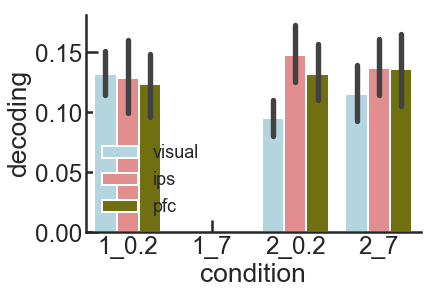

In [64]:
df = pd.DataFrame(df_dec)
df.columns = ['decoding', 'area', 'condition', 'subject']

sns.barplot(x='condition', y='decoding', hue='area', data=df, palette=['lightblue', 'lightcoral', 'olive'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})